In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn       # importing libaries

In [2]:
univ=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Universities.csv")

In [3]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return x          # normalization with seaborn norm

In [5]:
df_norm = norm_func(univ.iloc[:,1:])

In [6]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


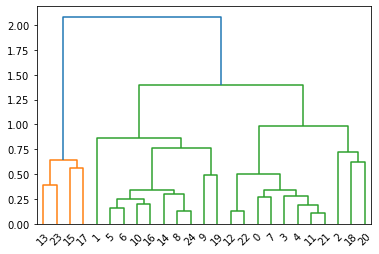

In [7]:
dendrogram= sch.dendrogram(sch.linkage(df_norm,method="complete"))   # create dendrogram

In [8]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean", linkage="complete")
# create cluster

In [9]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [10]:
y_hc= hc.fit_predict(df_norm)
# save cluster for chart
# Cluster = pd.datafreame(y_hc,columns=["Clusters"])

In [11]:
y_hc

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0], dtype=int64)

In [13]:
univ['h_clusterid'] = y_hc

In [14]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [16]:
univ1=univ.sort_values("h_clusterid")
univ1.iloc[:,[0,-1]]

,Univ,h_clusterid
24,Yale,0
14,Princeton,0
10,MIT,0
9,JohnsHopkins,0
16,Stanford,0
19,UChicago,0
8,Harvard,0
5,Dartmouth,0
6,Duke,0
23,UWisconsin,1


In [17]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True).frame

In [18]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return x  

In [20]:
df_norm = norm_func(data.iloc[:,:4])

In [21]:
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


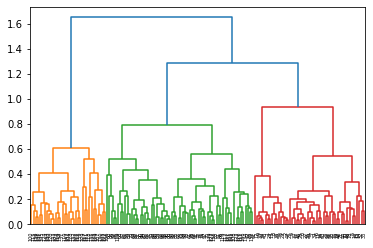

In [22]:
dendrogram= sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [23]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [24]:
y_hc= hc.fit_predict(df_norm)

In [25]:
y_hc

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [26]:
data['h_clusterid'] = y_hc

In [27]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,h_clusterid
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,3
2,4.7,3.2,1.3,0.2,0,3
3,4.6,3.1,1.5,0.2,0,3
4,5.0,3.6,1.4,0.2,0,2


In [28]:
data1=data.sort_values("h_clusterid")
data1.iloc[:,[0,-1]]

,sepal length (cm),h_clusterid
116,6.5,0
102,7.1,0
125,7.2,0
124,6.7,0
77,6.7,0
...,...,...
96,5.7,4
98,5.1,4
99,5.7,4
119,6.0,4


In [29]:
data1.iloc[:,[1,-1]]

,sepal width (cm),h_clusterid
116,3.0,0
102,3.0,0
125,3.2,0
124,3.3,0
77,3.0,0
...,...,...
96,2.9,4
98,2.5,4
99,2.8,4
119,2.2,4


In [30]:
data1.iloc[:,[2,-1]]

,petal length (cm),h_clusterid
116,5.5,0
102,5.9,0
125,6.0,0
124,5.7,0
77,5.0,0
...,...,...
96,4.2,4
98,3.0,4
99,4.1,4
119,5.0,4


In [31]:
data1.iloc[:,[3,-1]]

,petal width (cm),h_clusterid
116,1.8,0
102,2.1,0
125,1.8,0
124,2.1,0
77,1.7,0
...,...,...
96,1.3,4
98,1.1,4
99,1.3,4
119,1.5,4


In [42]:
data2=data1.iloc[:,[ 0,1,2,3,-1]]

In [45]:
data2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),h_clusterid
116,6.5,3.0,5.5,1.8,0
102,7.1,3.0,5.9,2.1,0
125,7.2,3.2,6.0,1.8,0
124,6.7,3.3,5.7,2.1,0
77,6.7,3.0,5.0,1.7,0
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,4
98,5.1,2.5,3.0,1.1,4
99,5.7,2.8,4.1,1.3,4
119,6.0,2.2,5.0,1.5,4
